<img src="images/full_logo.png" width="400" align="center"/>

# Análisis de la calidad del aire en Bogotá (enero 2021 - junio 2023)

    Maestría en Ingeniería
    Modelado y desarrollo de software
    Autor: Gonzalo Novoa
    junio de 2023

<h1>Tabla de contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Análisis-exploratorio-de-datos" data-toc-modified-id="Análisis-exploratorio-de-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Análisis exploratorio de datos</a></span><ul class="toc-item"><li><span><a href="#Modulos-usados" data-toc-modified-id="Modulos-usados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modulos usados</a></span></li><li><span><a href="#Importación-de-datos" data-toc-modified-id="Importación-de-datos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importación de datos</a></span></li><li><span><a href="#Tipos-de-variables" data-toc-modified-id="Tipos-de-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Tipos de variables</a></span></li><li><span><a href="#Periodo-analizado" data-toc-modified-id="Periodo-analizado-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Periodo analizado</a></span></li><li><span><a href="#Valores-nulos-y-NAN" data-toc-modified-id="Valores-nulos-y-NAN-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Valores nulos y NAN</a></span></li><li><span><a href="#Lista-de-estaciones" data-toc-modified-id="Lista-de-estaciones-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Lista de estaciones</a></span></li><li><span><a href="#Gráficas" data-toc-modified-id="Gráficas-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Gráficas</a></span><ul class="toc-item"><li><span><a href="#Concentración-diaria-de-PM2.5" data-toc-modified-id="Concentración-diaria-de-PM2.5-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Concentración diaria de PM2.5</a></span></li><li><span><a href="#Concentración-diaria-de-PM10" data-toc-modified-id="Concentración-diaria-de-PM10-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Concentración diaria de PM10</a></span></li></ul></li></ul></li><li><span><a href="#Modelo-Gradient-Boosting" data-toc-modified-id="Modelo-Gradient-Boosting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modelo <em>Gradient Boosting</em></a></span><ul class="toc-item"><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train / Test Split</a></span></li></ul></li></ul></div>

## Análisis exploratorio de datos

### Modulos usados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importación de datos

In [3]:
df = pd.read_csv("data/AirQuality_Bogota_Estaciones_20210101_20230614.csv", sep = ";", decimal = ',')
df["datetime"] = pd.date_range('2021-01-01 01:00:00', periods=len(df), freq='H')
df["month"] = df["datetime"].dt.month
df

,datetime,bolivia_pm10,bolivia_pm2.5,carvajal_pm10,carvajal_pm2.5,car_pm10,car_pm2.5,colina_pm10,colina_pm2.5,fontibon_pm10,...,paranda_pm2.5,sancristobal_pm10,sancristobal_pm2.5,suba_pm10,suba_pm2.5,tunal_pm10,tunal_pm2.5,usaquen_pm10,usaquen_pm2.5,month
0,2021-01-01 01:00:00,59.6,34.6,150.0,109.0,21.6,21.6,NaN,NaN,40.3,...,23.0,53.0,49.0,NaN,NaN,NaN,140.0,16.8,13.0,1
1,2021-01-01 02:00:00,96.0,59.6,179.0,145.0,30.9,25.0,NaN,NaN,92.5,...,36.0,35.0,14.0,NaN,NaN,183.0,143.0,11.7,NaN,1
2,2021-01-01 03:00:00,96.3,62.7,235.0,188.0,35.7,NaN,NaN,NaN,68.3,...,50.0,17.0,17.0,NaN,NaN,186.0,171.0,15.4,11.2,1
3,2021-01-01 04:00:00,108.0,64.0,52.0,42.0,42.2,NaN,NaN,NaN,61.3,...,54.0,52.0,47.0,NaN,NaN,204.0,23.0,8.8,7.6,1
4,2021-01-01 05:00:00,88.2,52.9,13.0,10.0,52.5,52.5,NaN,NaN,63.9,...,69.0,37.0,33.0,NaN,NaN,41.0,1.0,6.0,5.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21475,2023-06-14 20:00:00,12.4,3.6,NaN,NaN,6.6,3.0,7.5,3.3,22.6,...,3.6,10.0,6.0,16.3,15.0,15.0,15.0,10.0,4.0,6
21476,2023-06-14 21:00:00,8.4,3.5,NaN,NaN,5.1,2.0,7.6,4.7,27.3,...,3.6,9.0,3.0,21.0,9.0,19.0,13.0,7.0,5.0,6
21477,2023-06-14 22:00:00,6.0,3.3,NaN,NaN,4.0,0.0,6.3,4.8,20.1,...,4.3,8.0,8.0,14.9,8.0,18.0,11.0,7.3,2.0,6
21478,2023-06-14 23:00:00,4.6,3.4,NaN,NaN,5.2,4.0,5.8,4.7,12.5,...,4.0,5.0,3.0,11.4,5.0,10.0,7.0,7.8,0.0,6


### Tipos de variables

In [4]:
df.dtypes

datetime              datetime64[ns]
bolivia_pm10                 float64
bolivia_pm2.5                float64
carvajal_pm10                float64
carvajal_pm2.5               float64
car_pm10                     float64
car_pm2.5                    float64
colina_pm10                  float64
colina_pm2.5                 float64
fontibon_pm10                float64
fontibon_pm2.5               float64
guaymaral_pm10               float64
guaymaral_pm2.5              float64
kennedy_pm10                 float64
kennedy_pm2.5                float64
lasferias_pm10               float64
lasferias_pm2.5              float64
mambiente_pm10               float64
mambiente_pm2.5              float64
mfontibon_pm10               float64
mfontibon_pm2.5              float64
paranda_pm10                 float64
paranda_pm2.5                float64
sancristobal_pm10            float64
sancristobal_pm2.5           float64
suba_pm10                    float64
suba_pm2.5                   float64
t

### Periodo analizado

In [5]:
df["datetime"].min(), df["datetime"].max()

(Timestamp('2021-01-01 01:00:00'), Timestamp('2023-06-15 00:00:00'))

In [6]:
df["datetime"].max() - df["datetime"].min()

Timedelta('894 days 23:00:00')

Los datos tienen registros desde enero de 2021 a junio de 2023, durante 894 días y 23 horas

### Valores nulos y NAN

In [7]:
df.isna().sum()

datetime                  0
bolivia_pm10           1888
bolivia_pm2.5           786
carvajal_pm10         11923
carvajal_pm2.5        12007
car_pm10               1791
car_pm2.5               540
colina_pm10            2770
colina_pm2.5           2364
fontibon_pm10           954
fontibon_pm2.5          879
guaymaral_pm10         1249
guaymaral_pm2.5         767
kennedy_pm10           2682
kennedy_pm2.5          1704
lasferias_pm10         1622
lasferias_pm2.5         688
mambiente_pm10         2501
mambiente_pm2.5         372
mfontibon_pm10         2617
mfontibon_pm2.5        2936
paranda_pm10           7075
paranda_pm2.5          1022
sancristobal_pm10      1109
sancristobal_pm2.5      617
suba_pm10              1753
suba_pm2.5             1895
tunal_pm10             1084
tunal_pm2.5             690
usaquen_pm10           4642
usaquen_pm2.5          4665
month                     0
dtype: int64

In [8]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 32 columns and 21480 Rows.
There are 30 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
carvajal_pm2.5,3,12007,55.9,12010,55.9,float64
carvajal_pm10,0,11923,55.5,11923,55.5,float64
paranda_pm10,0,7075,32.9,7075,32.9,float64
usaquen_pm2.5,833,4665,21.7,5498,25.6,float64
usaquen_pm10,2,4642,21.6,4644,21.6,float64
mfontibon_pm2.5,11,2936,13.7,2947,13.7,float64
colina_pm10,6,2770,12.9,2776,12.9,float64
kennedy_pm10,0,2682,12.5,2682,12.5,float64
mfontibon_pm10,1,2617,12.2,2618,12.2,float64
mambiente_pm10,0,2501,11.6,2501,11.6,float64


### Lista de estaciones

In [9]:
stations_list = ["Bolivia", "Carvajal", "CAR", "Colina", "Fontibón", "Guaymaral", 
            "Kennedy", "Las Ferias", "M.Ambiente", "Mov.Fontibón", "P.Aranda", "S.Cristobal",
            "Suba", "Tunal", "Usaquen"]

### Gráficas

#### Concentración diaria de PM2.5

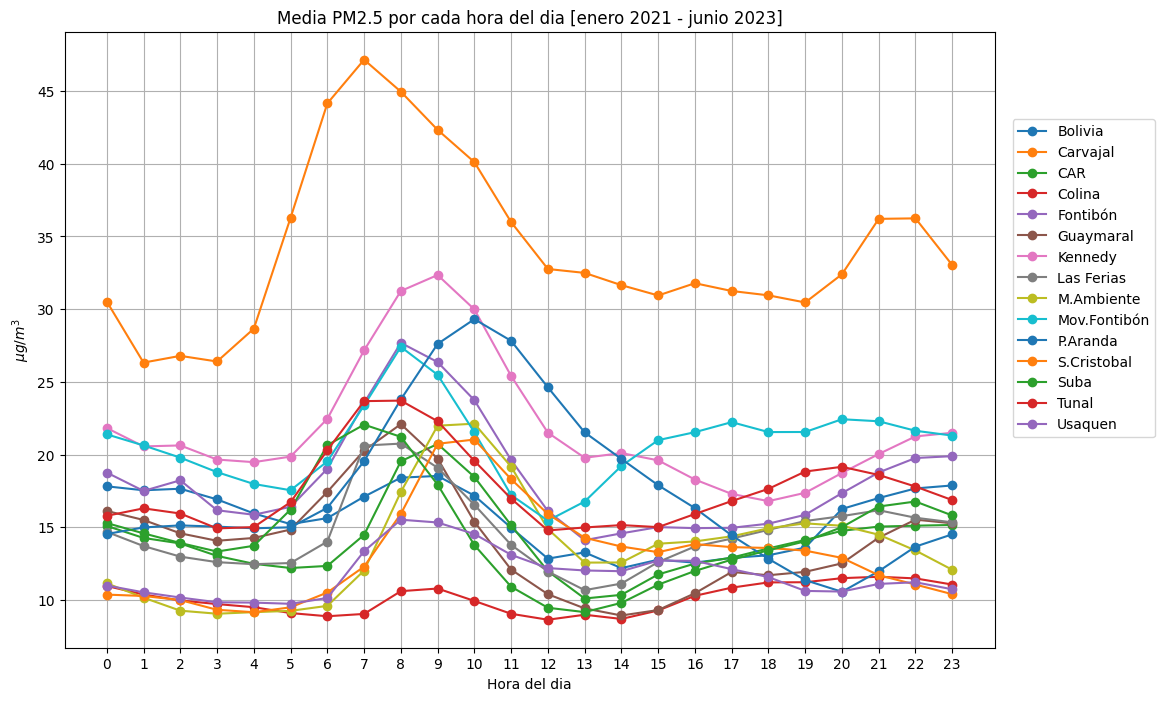

In [10]:
fig, axs = plt.subplots(figsize=(12, 8))
df.groupby(df["datetime"].dt.hour)["bolivia_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["carvajal_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["car_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["colina_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["fontibon_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["guaymaral_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["kennedy_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["lasferias_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["mambiente_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["mfontibon_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["paranda_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["sancristobal_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["suba_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["tunal_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["usaquen_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
plt.title('Media PM2.5 por cada hora del dia [enero 2021 - junio 2023]')
plt.xlabel("Hora del dia");
plt.ylabel("$ \mu g /m^3$");
plt.legend(stations_list, bbox_to_anchor = (1.18, 0.6), loc='center right')
plt.xticks(range(0, 24, 1))
plt.grid()

#### Concentración diaria de PM10

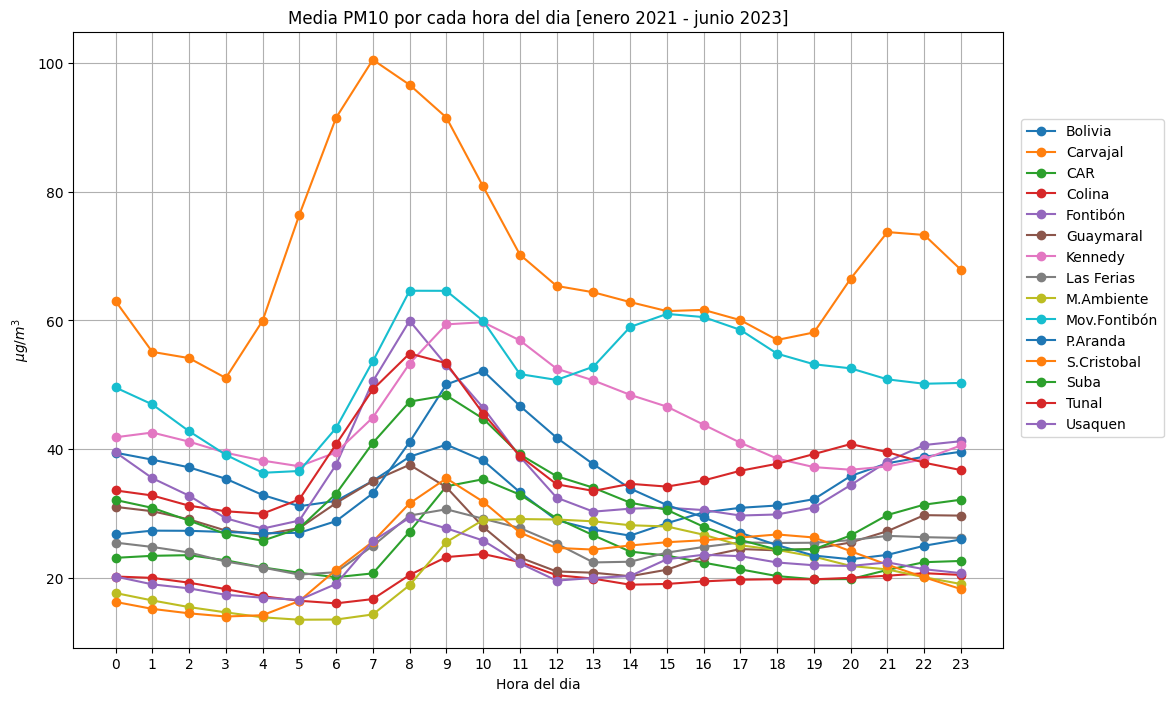

In [11]:
fig, axs = plt.subplots(figsize=(12, 8))
df.groupby(df["datetime"].dt.hour)["bolivia_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["carvajal_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["car_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["colina_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["fontibon_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["guaymaral_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["kennedy_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["lasferias_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["mambiente_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["mfontibon_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["paranda_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["sancristobal_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["suba_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["tunal_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.hour)["usaquen_pm10"].mean().plot(style="-o", rot=0, ax=axs)
plt.title('Media PM10 por cada hora del dia [enero 2021 - junio 2023]')
plt.xlabel("Hora del dia");
plt.ylabel("$ \mu g /m^3$");
plt.legend(stations_list, bbox_to_anchor = (1.18, 0.6), loc='center right')
plt.xticks(range(0, 24, 1))
plt.grid()

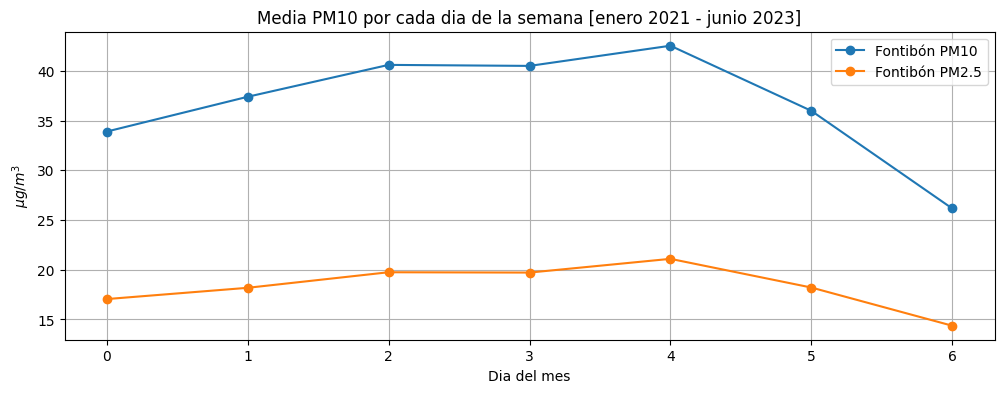

In [12]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["datetime"].dt.dayofweek)["fontibon_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.dayofweek)["fontibon_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
plt.title('Media PM10 por cada dia de la semana [enero 2021 - junio 2023]')
plt.xlabel("Dia del mes");
plt.ylabel("$ \mu g /m^3$");
plt.legend(['Fontibón PM10', 'Fontibón PM2.5'])
plt.grid()

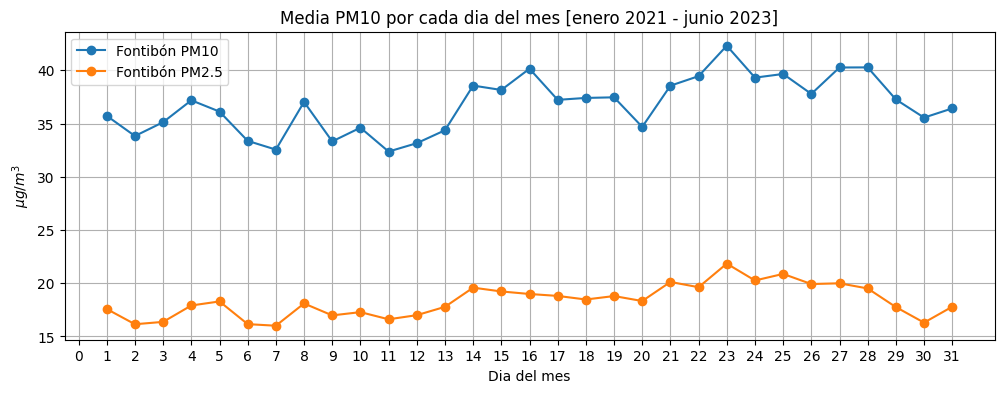

In [13]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["datetime"].dt.day)["fontibon_pm10"].mean().plot(style="-o", rot=0, ax=axs)
df.groupby(df["datetime"].dt.day)["fontibon_pm2.5"].mean().plot(style="-o", rot=0, ax=axs)
plt.title('Media PM10 por cada dia del mes [enero 2021 - junio 2023]')
plt.xlabel("Dia del mes");
plt.ylabel("$ \mu g /m^3$");
plt.legend(['Fontibón PM10', 'Fontibón PM2.5'])
plt.xticks(range(0, 32, 1))
plt.grid()

In [14]:
df_mean = df.fillna(df.mean())
df_mean.isna().sum()

datetime              0
bolivia_pm10          0
bolivia_pm2.5         0
carvajal_pm10         0
carvajal_pm2.5        0
car_pm10              0
car_pm2.5             0
colina_pm10           0
colina_pm2.5          0
fontibon_pm10         0
fontibon_pm2.5        0
guaymaral_pm10        0
guaymaral_pm2.5       0
kennedy_pm10          0
kennedy_pm2.5         0
lasferias_pm10        0
lasferias_pm2.5       0
mambiente_pm10        0
mambiente_pm2.5       0
mfontibon_pm10        0
mfontibon_pm2.5       0
paranda_pm10          0
paranda_pm2.5         0
sancristobal_pm10     0
sancristobal_pm2.5    0
suba_pm10             0
suba_pm2.5            0
tunal_pm10            0
tunal_pm2.5           0
usaquen_pm10          0
usaquen_pm2.5         0
month                 0
dtype: int64

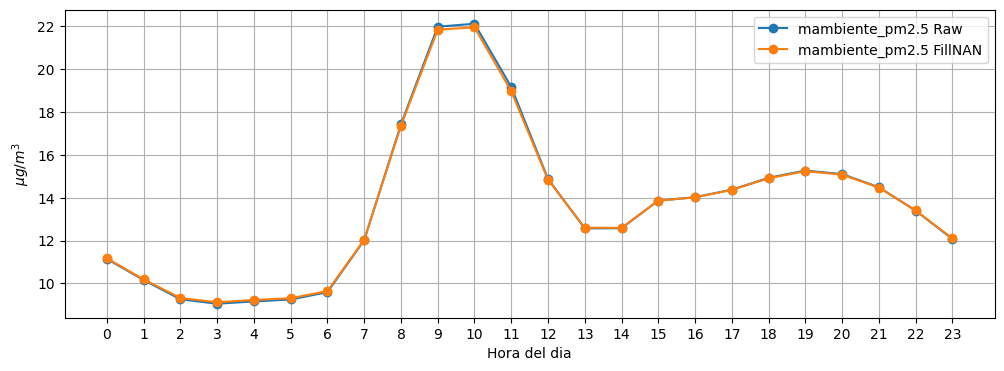

In [15]:
station_to_plot = "mambiente_pm2.5"
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["datetime"].dt.hour)[station_to_plot].mean().plot(style="-o", rot=0, ax=axs)
df_mean.groupby(df_mean["datetime"].dt.hour)[station_to_plot].mean().plot(style="-o", rot=0, ax=axs)
plt.xlabel("Hora del dia");
plt.ylabel("$ \mu g /m^3$");
plt.legend([station_to_plot + ' Raw', station_to_plot + ' FillNAN'])
plt.xticks(range(0, 24, 1))
plt.grid()

Los picos coinciden con la movilización de los trabajadores y las mejores calidad del area coinciden con las areas verdes de la ciudad

## Modelo *Gradient Boosting*

In [16]:
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

In [17]:
station = 'mambiente' 
station_pm10 = station + '_pm10'
station_pm25 =  station + '_pm2.5'
df = df_mean[['datetime', station_pm10, station_pm25]]
df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)
df

,mambiente_pm10,mambiente_pm2.5
datetime,,
2021-01-01 01:00:00,8.2,6.000000
2021-01-01 02:00:00,16.8,12.000000
2021-01-01 03:00:00,12.8,13.651706
2021-01-01 04:00:00,15.1,11.000000
2021-01-01 05:00:00,13.0,13.000000
...,...,...
2023-06-14 20:00:00,11.0,11.000000
2023-06-14 21:00:00,6.0,6.000000
2023-06-14 22:00:00,5.0,4.000000


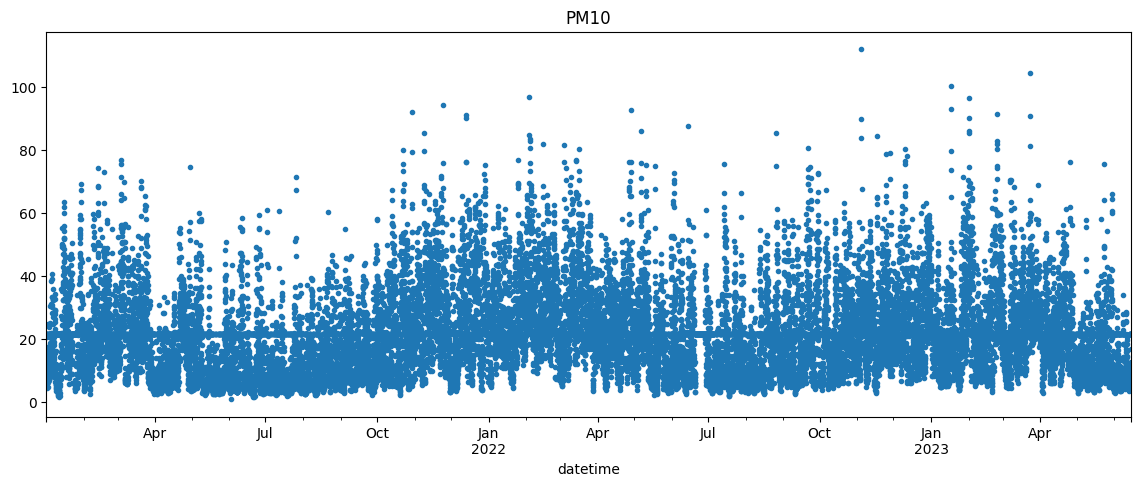

In [18]:
df[station_pm10].plot(style='.',
        figsize=(14, 5),
        color=color_pal[0],
        title='PM10')
plt.show()

### Train / Test Split

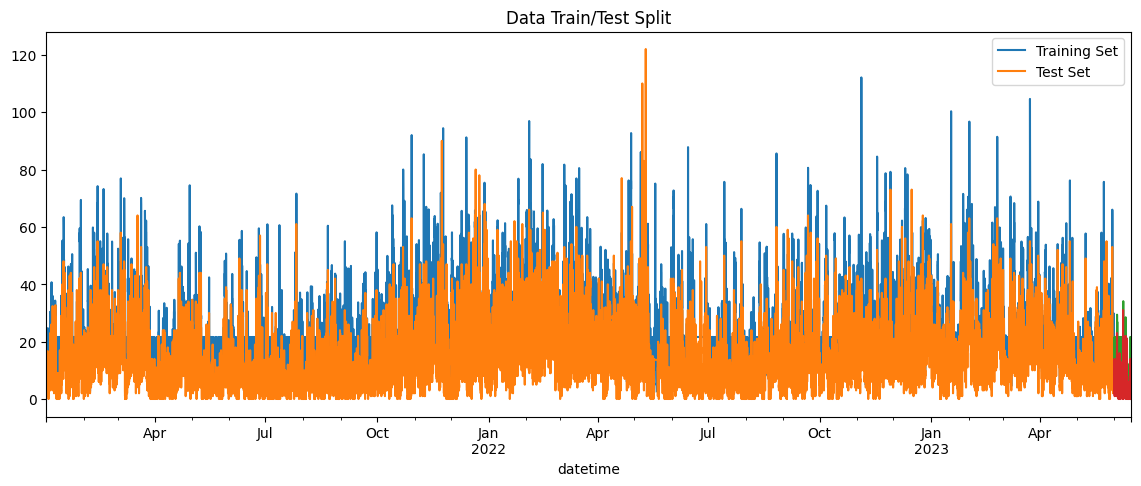

In [19]:
train = df.loc[df.index < '06-01-2023']
test = df.loc[df.index >= '06-01-2023']

fig, ax = plt.subplots(figsize=(14, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

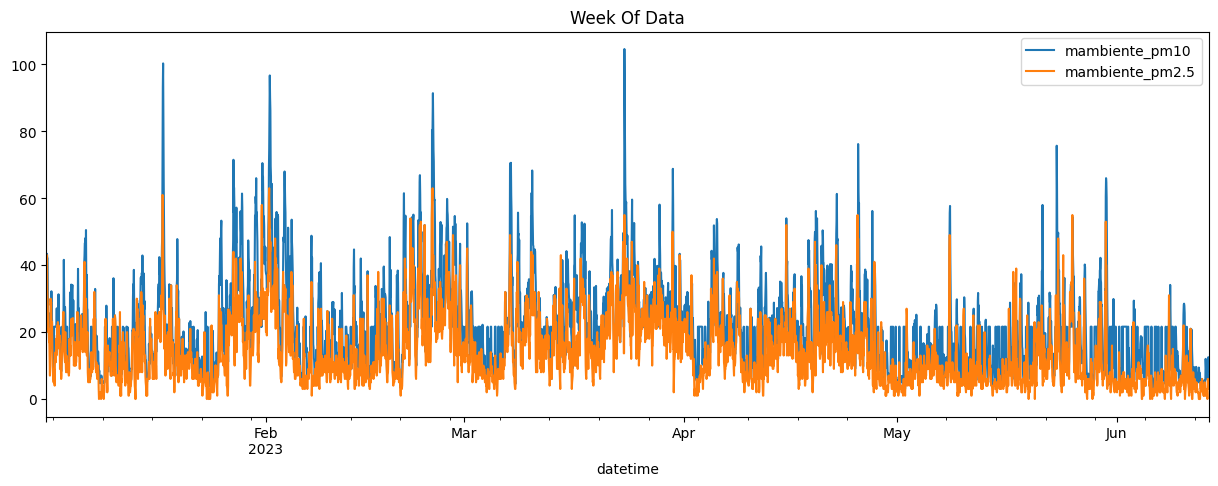

In [20]:
df.loc[(df.index > '01-01-2023') & (df.index < '06-14-2023')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [21]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

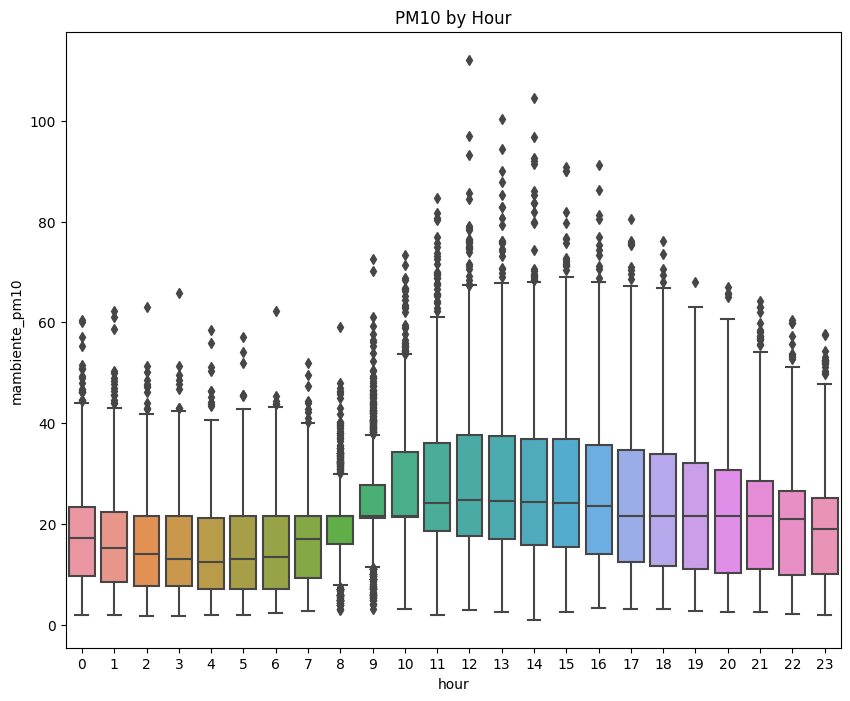

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y=station_pm10)
ax.set_title('PM10 by Hour')
plt.show()

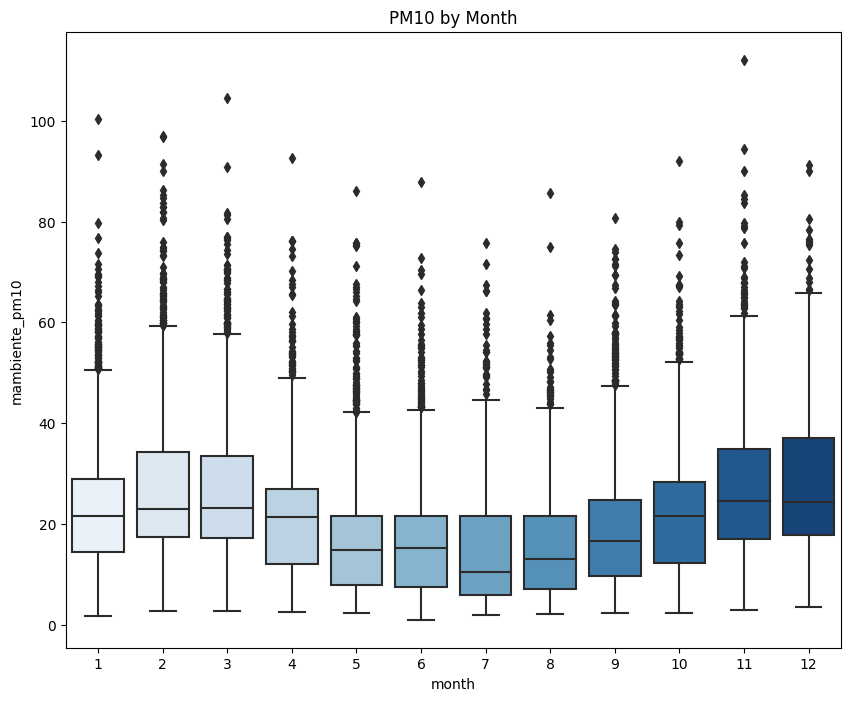

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y= station_pm10, palette='Blues')
ax.set_title('PM10 by Month')
plt.show()

In [24]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', station_pm25]
TARGET = station_pm10

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [25]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[17:25:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:24.98438	validation_1-rmse:12.97057
[100]	validation_0-rmse:12.11309	validation_1-rmse:6.71435
[200]	validation_0-rmse:8.83215	validation_1-rmse:5.86900
[278]	validation_0-rmse:8.16170	validation_1-rmse:5.87368


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

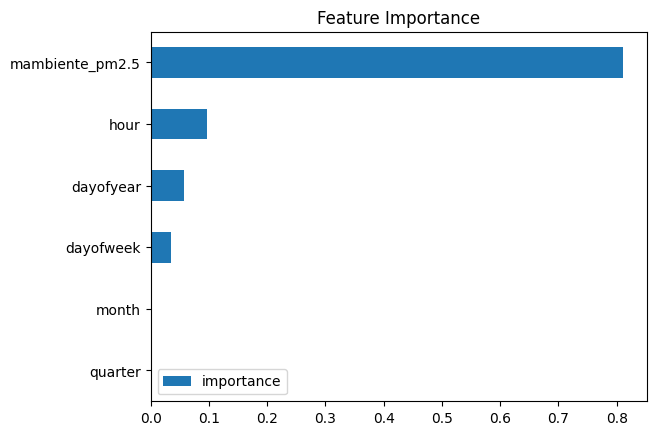

In [26]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

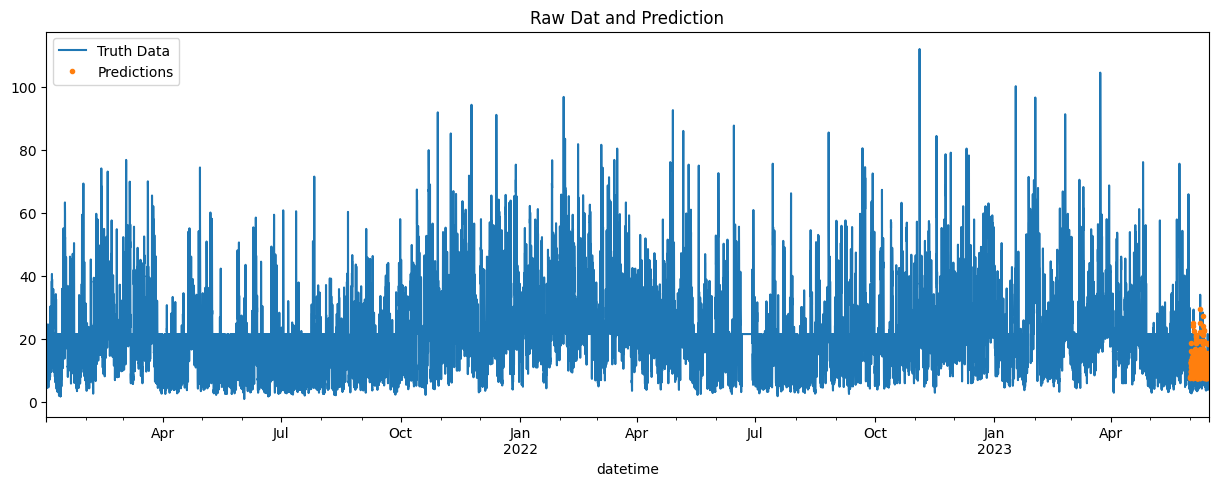

In [27]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[[station_pm10]].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

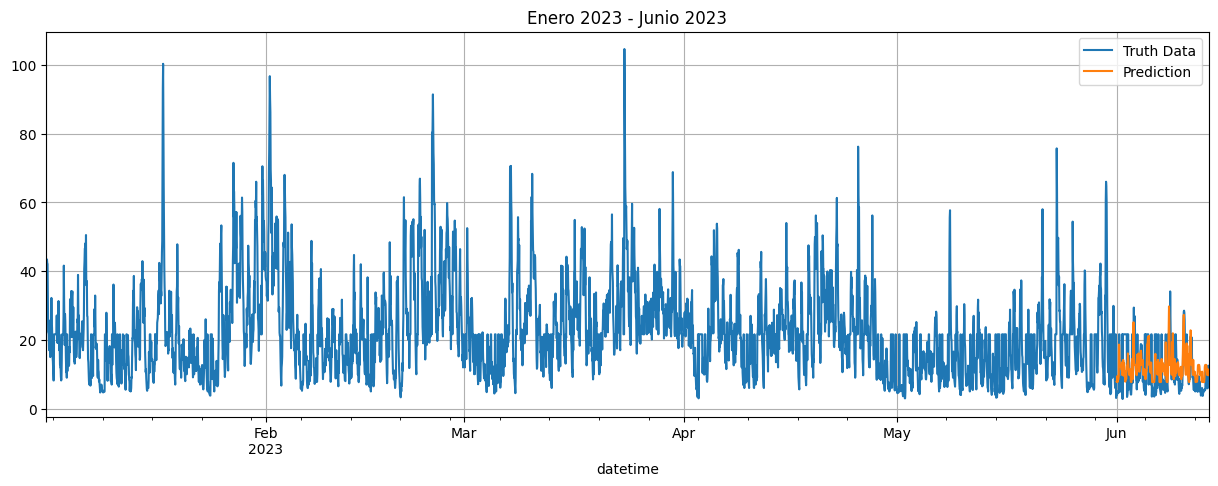

In [28]:
ax = df.loc[(df.index > '01-01-2023') & (df.index < '06-14-2023')][station_pm10].plot(figsize=(15, 5), title='Enero 2023 - Junio 2023')
df.loc[(df.index > '01-01-2023') & (df.index < '06-14-2023')]['prediction'].plot(style='-')
plt.legend(['Truth Data','Prediction'])
plt.grid()
plt.show()

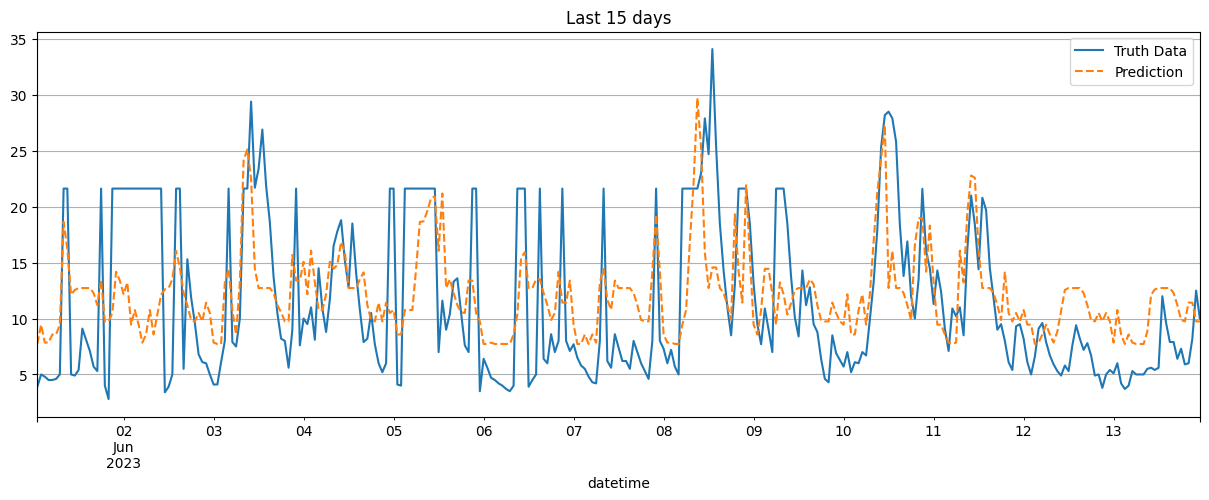

In [29]:
ax = df.loc[(df.index > '06-01-2023 ') & (df.index < '06-14-2023')][station_pm10].plot(figsize=(15, 5), title='Last 15 days')
df.loc[(df.index > '06-01-2023') & (df.index < '06-14-2023')]['prediction'].plot(style='--')
plt.legend(['Truth Data','Prediction'])
plt.grid()
plt.show()

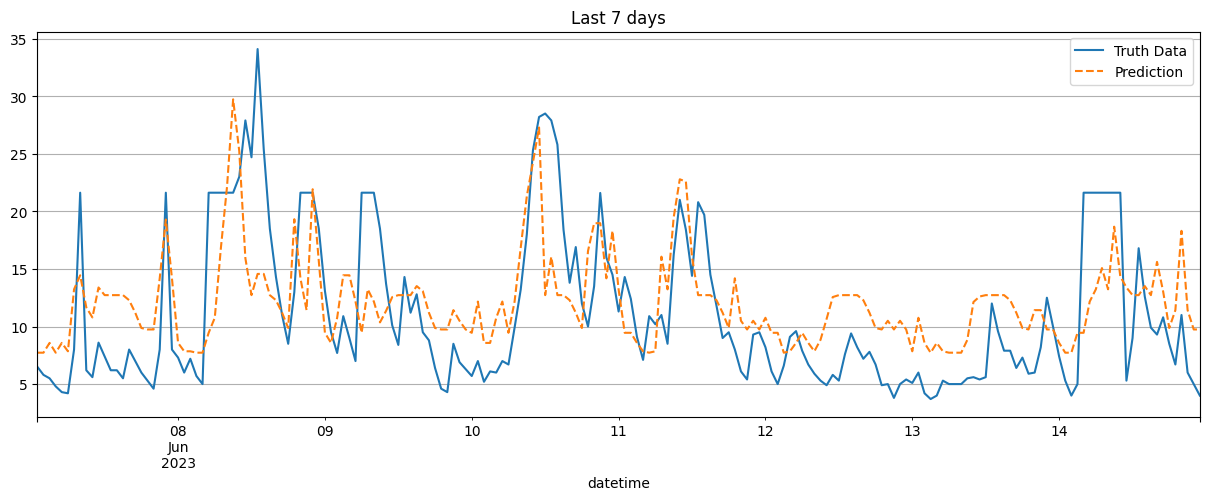

In [30]:
ax = df.loc[(df.index > '06-07-2023 ') & (df.index < '06-15-2023')][station_pm10].plot(figsize=(15, 5), title='Last 7 days')
df.loc[(df.index > '06-07-2023') & (df.index < '06-15-2023')]['prediction'].plot(style='--')
plt.legend(['Truth Data','Prediction'])
plt.grid()
plt.show()

In [31]:
score = np.sqrt(mean_squared_error(test[station_pm10], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 5.84


In [32]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2023-06-02    8.125744
2023-06-08    5.747280
2023-06-01    5.637820
2023-06-05    5.540896
2023-06-06    5.361946
2023-06-14    5.185822
2023-06-03    4.988345
2023-06-10    4.776127
2023-06-07    4.538369
2023-06-09    4.286449
Name: error, dtype: float64

# Algoritmo completo

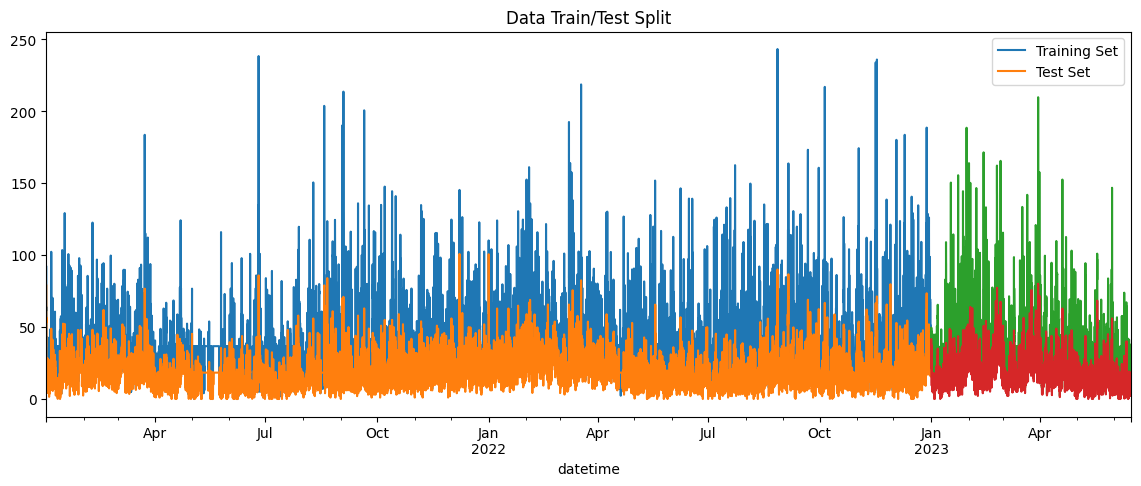

[17:49:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:41.97897	validation_1-rmse:43.26077
[100]	validation_0-rmse:19.72207	validation_1-rmse:20.52439
[200]	validation_0-rmse:13.92475	validation_1-rmse:14.21899
[300]	validation_0-rmse:12.69348	validation_1-rmse:12.62064
[400]	validation_0-rmse:12.32559	validation_1-rmse:12.09880
[500]	validation_0-rmse:12.15268	validation_1-rmse:11.91163
[600]	validation_0-rmse:12.00591	validation_1-rmse:11.81400
[700]	validation_0-rmse:11.91224	validation_1-rmse:11.77652
[800]	validation_0-rmse:11.84541	validation_1-rmse:11.75313
[900]	validation_0-rmse:11.78345	validation_1-rmse:11.73200
[995]	validation_0-rmse:11.72910	validation_1-rmse:11.73512


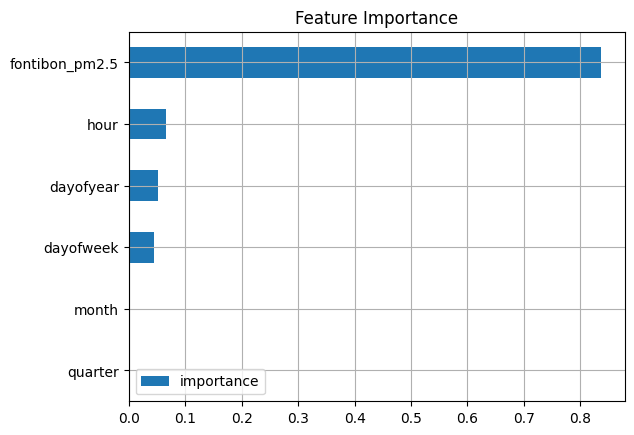

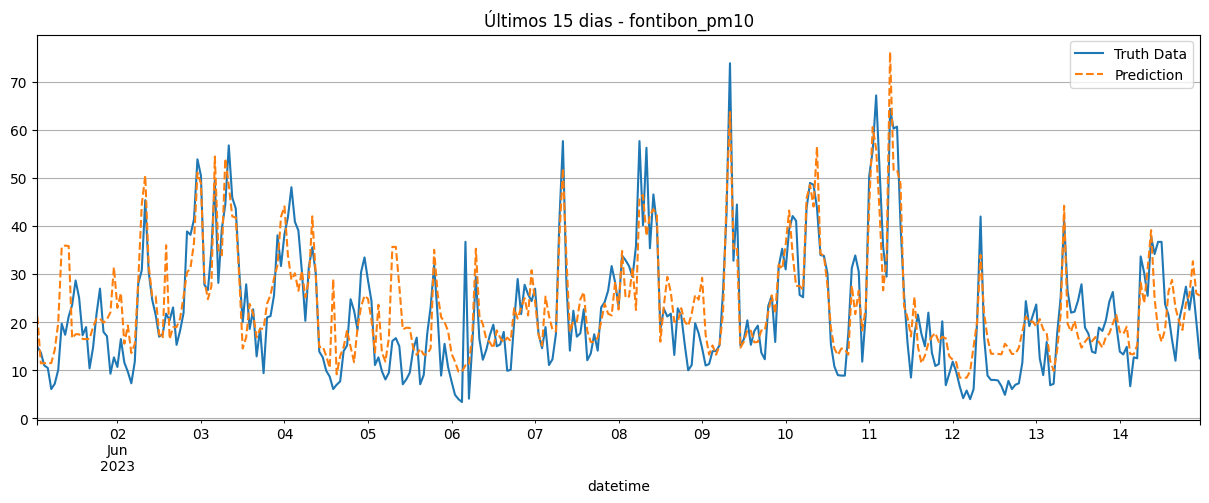

RMSE Score on Test set: 11.73


date
2023-01-30    26.393809
2023-02-01    21.703048
2023-01-27    20.175231
2023-01-25    19.481903
2023-02-14    19.319566
2023-02-24    18.526720
2023-02-13    18.270860
2023-01-23    18.080571
2023-03-17    18.058603
2023-02-08    17.070251
Name: error, dtype: float64

In [44]:
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

# Modificar estacion y periodo a analizar
#--------------------------------------
station = 'fontibon' 
date_to_train = '01-01-2023'
#--------------------------------------

station_pm10 = station + '_pm10'
station_pm25 =  station + '_pm2.5'
df = df_mean[['datetime', station_pm10, station_pm25]]
df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)

train = df.loc[df.index < date_to_train]
test = df.loc[df.index >= date_to_train]

fig, ax = plt.subplots(figsize=(14, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', station_pm25]
TARGET = station_pm10

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)
# Feature importance
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.grid()
plt.show()

test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

ax = df.loc[(df.index > '06-01-2023 ') & (df.index < '06-15-2023')][station_pm10].plot(figsize=(15, 5), title='Últimos 15 dias - ' + station_pm10)
df.loc[(df.index > '06-01-2023') & (df.index < '06-15-2023')]['prediction'].plot(style='--')
plt.legend(['Truth Data','Prediction'])
plt.grid()
plt.show()

score = np.sqrt(mean_squared_error(test[station_pm10], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

In [46]:
import pickle

# Store data (serialize)
with open('pages/model_fontibon', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Load data (deserialize)
#with open('filename.pickle', 'rb') as handle:
#    unserialized_data = pickle.load(handle)
#
#print(your_data == unserialized_data)

station = 'fontibon' 
date_to_train = '06-01-2023'
#--------------------------------------

station_pm10 = station + '_pm10'
station_pm25 =  station + '_pm2.5'

# Load data (deserialize)
with open('pickle/model_fontibon2', 'rb') as handle:
    df = pickle.load(handle)


ax = df.loc[(df.index > '06-01-2023 ') & (df.index < '06-15-2023')][station_pm10].plot(figsize=(15, 5), title='Últimos 15 dias - ' + station_pm10)
df.loc[(df.index > '06-01-2023') & (df.index < '06-15-2023')]['prediction'].plot(style='--')
plt.xlabel("días")
plt.ylabel("$ \mu g /m^3$")
plt.legend(['Datos reales','Predicción'])
plt.grid()

